# Game-Hangman
**Name:** *SAURAV MAHENDRA PRASAD*
<br>**RollNo:** 21112036
<br>**Class:** 5 BSc DS
<br>**Start Date:** 10/10/2023
<hr>


In [1]:
import pygame
import random

# Initialize Pygame
pygame.init()

# Constants
SCREEN_WIDTH = 1200
SCREEN_HEIGHT = 700  # Increased height to accommodate timer and score
BACKGROUND_COLOR = (255, 255, 255)
FONT_COLOR = (0, 0, 0)
WORD_LIST = [
    ("PYTHON", "A popular programming language known for its simplicity and readability."),
    ("JAVA", "An object-oriented programming language commonly used for building applications."),
    ("JAVASCRIPT", "A versatile scripting language often used for web development."),
    ("HTML", "A markup language for creating web pages."),
    ("CSS", "A style sheet language used for designing web pages."),
    ("RUBY", "A dynamic, open-source programming language with a focus on simplicity and productivity."),
    ("PHP", "A server-side scripting language used for web development."),
    ("CPLUSPLUS", "An extension of the C programming language that includes object-oriented features."),
    ("SWIFT", "A programming language developed by Apple for iOS, macOS, watchOS, and tvOS."),
    ("SQL", "A domain-specific language used for managing and querying relational databases."),
    ("ANDROID", "A mobile operating system developed by Google."),
    ("MACHINELEARNING", "A field of artificial intelligence focused on the development of algorithms that can learn and make predictions."),
    ("DATAANALYSIS", "The process of inspecting, cleaning, transforming, and modeling data to discover useful information."),
    ("CLOUDCOMPUTING", "The delivery of various services through the internet, including servers, storage, databases, networking, and more."),
    ("NETWORKSECURITY", "The practice of protecting computer systems and networks from theft, damage, or unauthorized access."),
    ("VIRTUALREALITY", "A simulated experience that can be similar to or completely different from the real world."),
    ("CRYPTOCURRENCY", "A digital or virtual form of currency that uses cryptography for security."),
    ("ARTIFICIALINTELLIGENCE", "The simulation of human intelligence processes by machines, especially computer systems."),
    ("BIGDATA", "Extremely large and complex data sets that can be analyzed to reveal patterns and trends."),
    ("GITHUB", "A web-based platform for version control and collaboration, primarily used for code."),
    ("FLASK", "A micro web framework for Python used to develop web applications."),
    ("DOCKER", "A platform for developing, shipping, and running applications in containers."),
    ("LINUX", "A free and open-source operating system known for its security and stability."),
    ("MONGODB", "A NoSQL database program that uses JSON-like documents with optional schemas."),
    ("AWS", "Amazon Web Services, a cloud computing platform offering a wide range of services."),
]
MAX_TRIES = 5
GAME_DURATION = 300  # 5 minutes (300 seconds)
CORRECT_GUESS_SCORE = 1

# Create the game window
screen = pygame.display.set_mode((SCREEN_WIDTH, SCREEN_HEIGHT))
pygame.display.set_caption("HANGMAN")

# Load a font
font = pygame.font.Font(None, 36)

# Function to check if the word is guessed
def is_word_guessed():
    return all(letter in guessed_letters for letter in word_to_guess)

# Function to draw the hangman
def draw_hangman(tries_left):
    parts = 6 - tries_left
    if parts >= 1:
        pygame.draw.circle(screen, FONT_COLOR, (400, 200), 40)  # Head
    if parts >= 2:
        pygame.draw.line(screen, FONT_COLOR, (400, 240), (400, 360), 5)  # Body
    if parts >= 3:
        pygame.draw.line(screen, FONT_COLOR, (400, 260), (450, 230), 5)  # Right Arm
    if parts >= 4:
        pygame.draw.line(screen, FONT_COLOR, (400, 260), (350, 230), 5)  # Left Arm
    if parts >= 5:
        pygame.draw.line(screen, FONT_COLOR, (400, 360), (450, 420), 5)  # Right Leg
    if parts >= 6:
        pygame.draw.line(screen, FONT_COLOR, (400, 360), (350, 420), 5)  # Left Leg

# Initialize game variables
word_to_guess = ""
word_clue = ""
guessed_letters = set()
tries_left = 0
game_started = False
start_time = 0
score = 0

# Function to start the game
def start_game():
    global word_to_guess, word_clue, guessed_letters, tries_left, game_started, start_time, score
    word, clue = random.choice(WORD_LIST)
    word_to_guess = word.upper()
    word_clue = clue
    guessed_letters = set()
    tries_left = MAX_TRIES
    game_started = True
    start_time = pygame.time.get_ticks()  # Record the start time
    score = 0  # Reset the score

# Main game loop
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        if event.type == pygame.MOUSEBUTTONDOWN and not game_started:
            if start_button_rect.collidepoint(event.pos):
                start_game()

        if event.type == pygame.KEYDOWN and tries_left > 0 and game_started:
            if event.unicode.isalpha() and event.unicode.isupper():
                letter = event.unicode
                if letter not in guessed_letters:
                    guessed_letters.add(letter)
                    if letter not in word_to_guess:
                        tries_left -= 1
                    else:
                        score += CORRECT_GUESS_SCORE  # Increase the score for a correct guess

    # Clear the screen
    screen.fill(BACKGROUND_COLOR)

    if not game_started:
        # Create and draw the start button
        start_button_rect = pygame.Rect(300, 300, 200, 50)
        pygame.draw.rect(screen, (0, 128, 0), start_button_rect)
        start_text = font.render("Start Game", True, (255, 255, 255))
        screen.blit(start_text, (325, 310))
    else:
        # Draw the hangman
        draw_hangman(tries_left)

        # Draw the word with underscores for unguessed letters
        display_word = ""
        for letter in word_to_guess:
            if letter in guessed_letters:
                display_word += letter + " "
            else:
                display_word += "_ "
        text = font.render(display_word, True, FONT_COLOR)
        screen.blit(text, (300, 400))

        # Draw the word clue
        clue_text = font.render("Clue: " + word_clue, True, FONT_COLOR)
        screen.blit(clue_text, (50, 50))

        # Draw the guessed letters
        guessed_text = "Guessed Letters: " + ", ".join(guessed_letters)
        guessed_text = font.render(guessed_text, True, FONT_COLOR)
        screen.blit(guessed_text, (50, 500))

        # Check for win or lose
        if is_word_guessed():
            game_result = "You Win!"
            game_started = False
        elif tries_left == 0:
            game_result = "You Lose! The word was " + word_to_guess
            game_started = False
        else:
            game_result = ""

        # Calculate time remaining
        elapsed_time = (pygame.time.get_ticks() - start_time) // 1000
        time_remaining = max(0, GAME_DURATION - elapsed_time)
        time_text = font.render(f"Time Remaining: {time_remaining} seconds", True, FONT_COLOR)
        screen.blit(time_text, (350, 600))  # Adjusted position for the time remaining text

        # Display the game result
        if game_result:
            result_text = font.render(game_result, True, FONT_COLOR)
            screen.blit(result_text, (350, 500))  # Adjusted position for the result text

        # Display the score
        score_text = font.render(f"Score: {score}", True, FONT_COLOR)
        screen.blit(score_text, (50, 600))  # Adjusted position for the score display

        # Check for game timeout
        if elapsed_time >= GAME_DURATION:
            game_result = "Time's up! You Lose!"
            game_started = False
            result_text = font.render(game_result, True, FONT_COLOR)
            screen.blit(result_text, (350, 500))  # Adjusted position for the result text

    # Update the display

    pygame.display.flip()

# Quit Pygame
pygame.quit()

pygame 2.5.2 (SDL 2.28.3, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


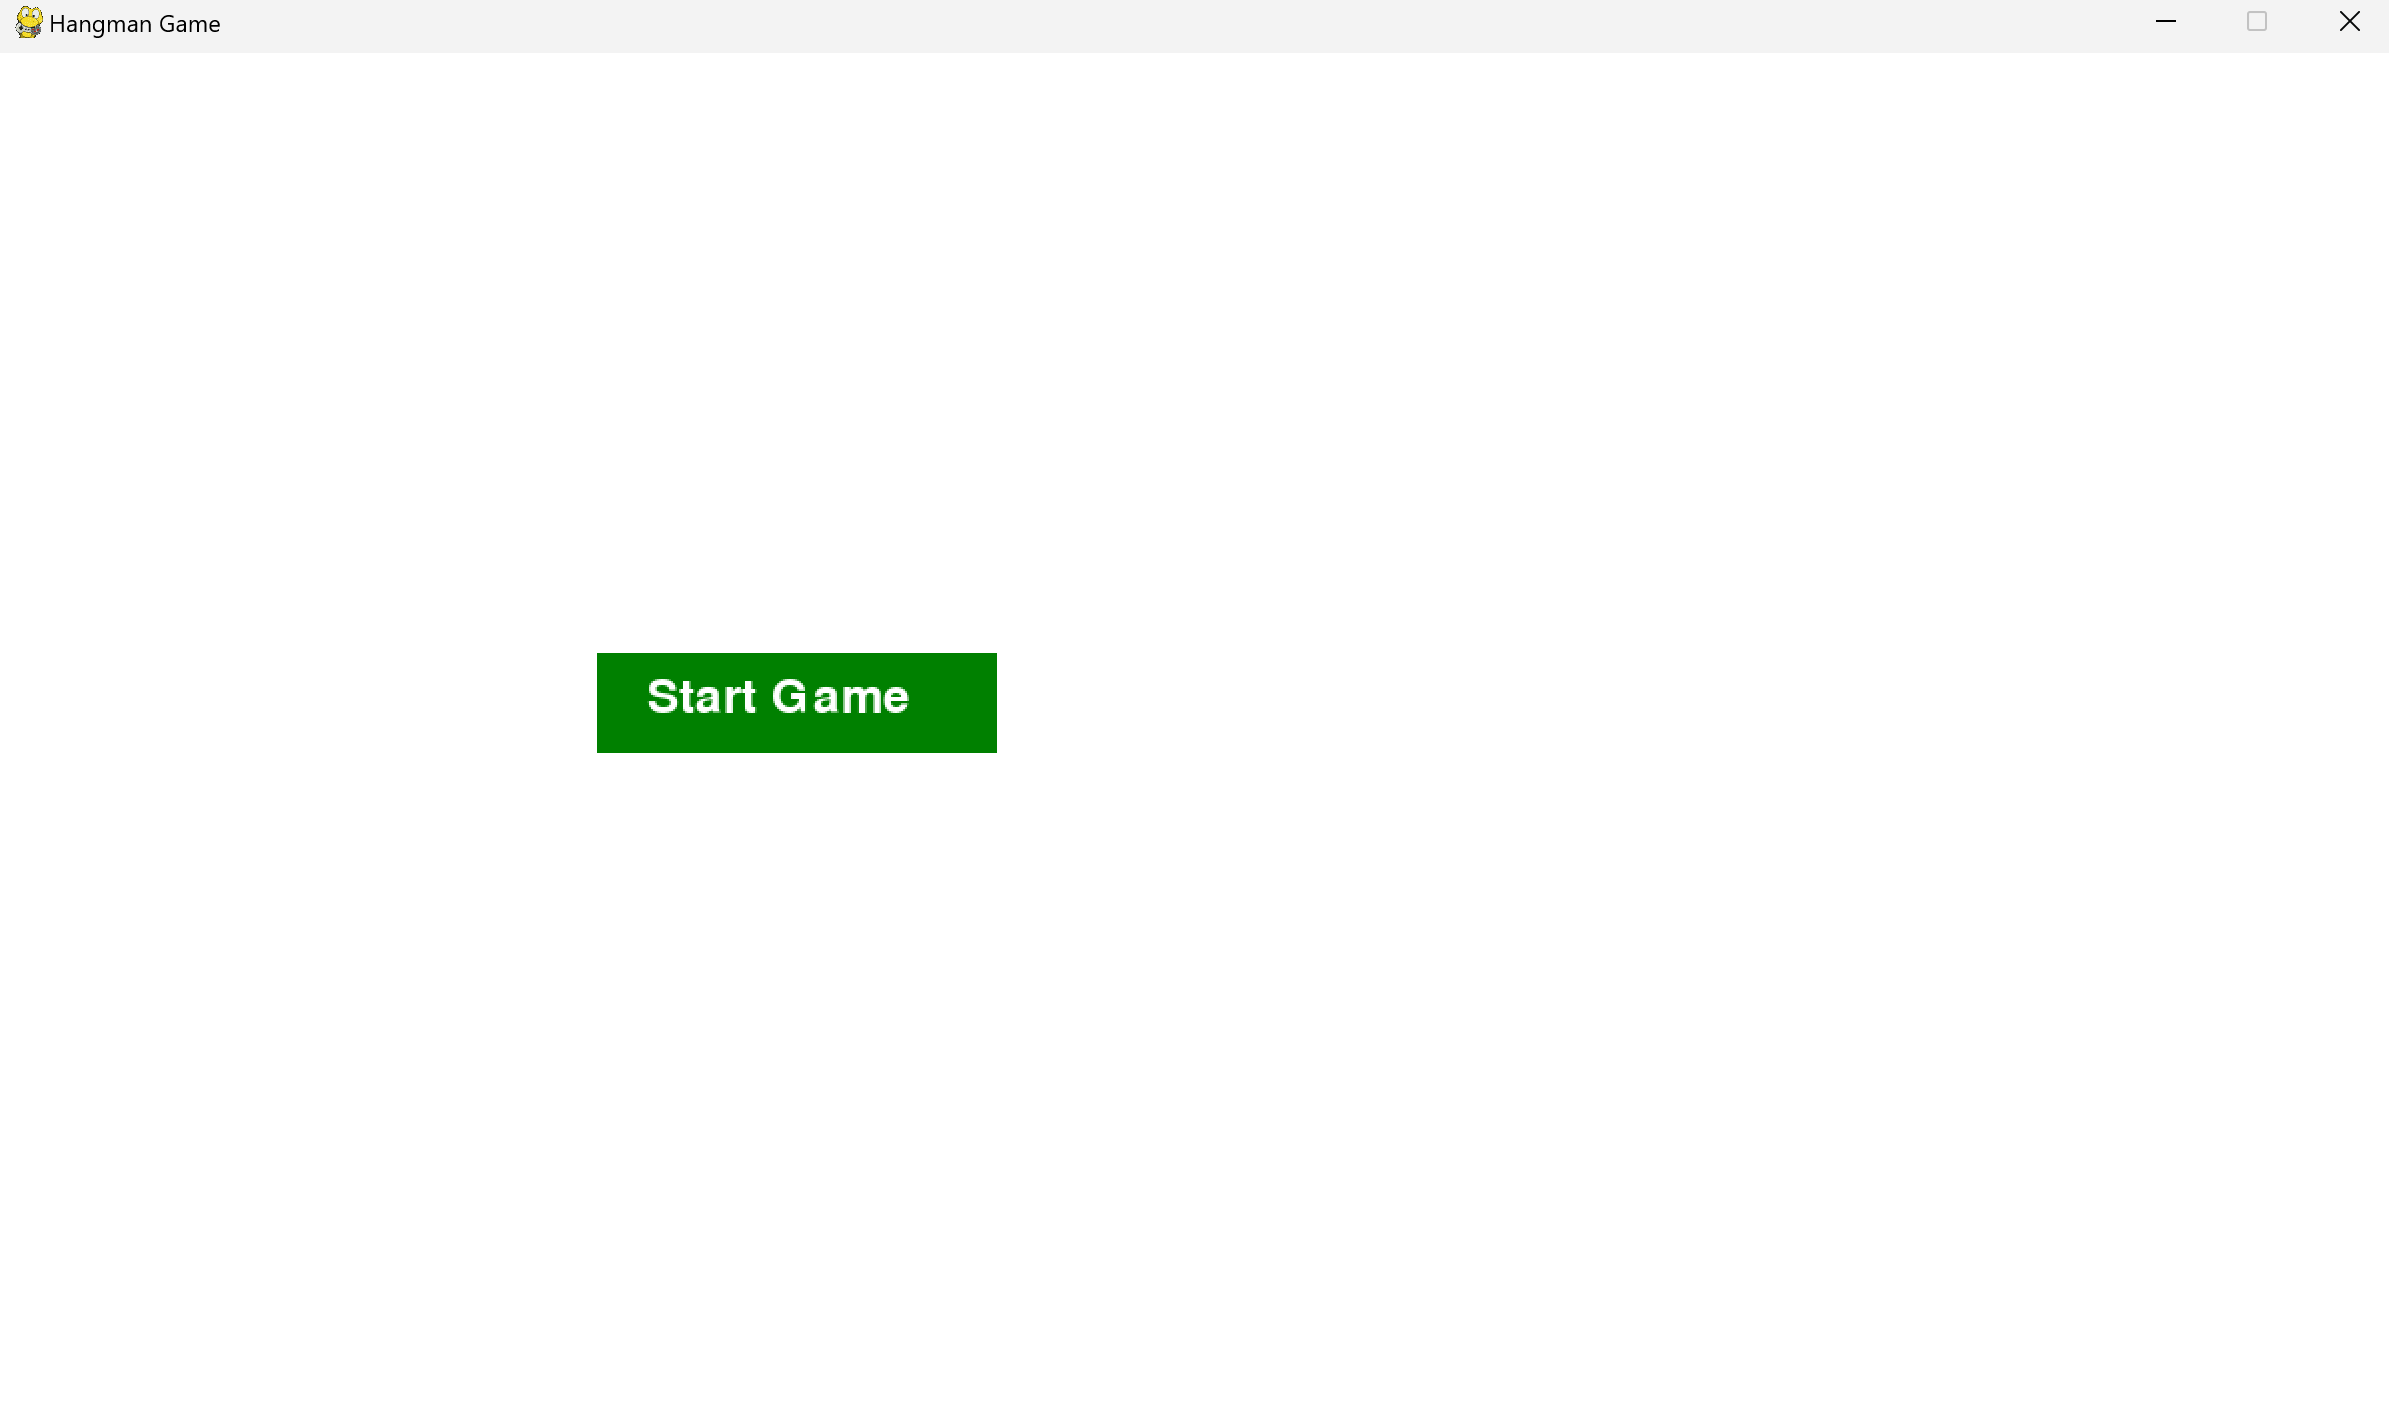

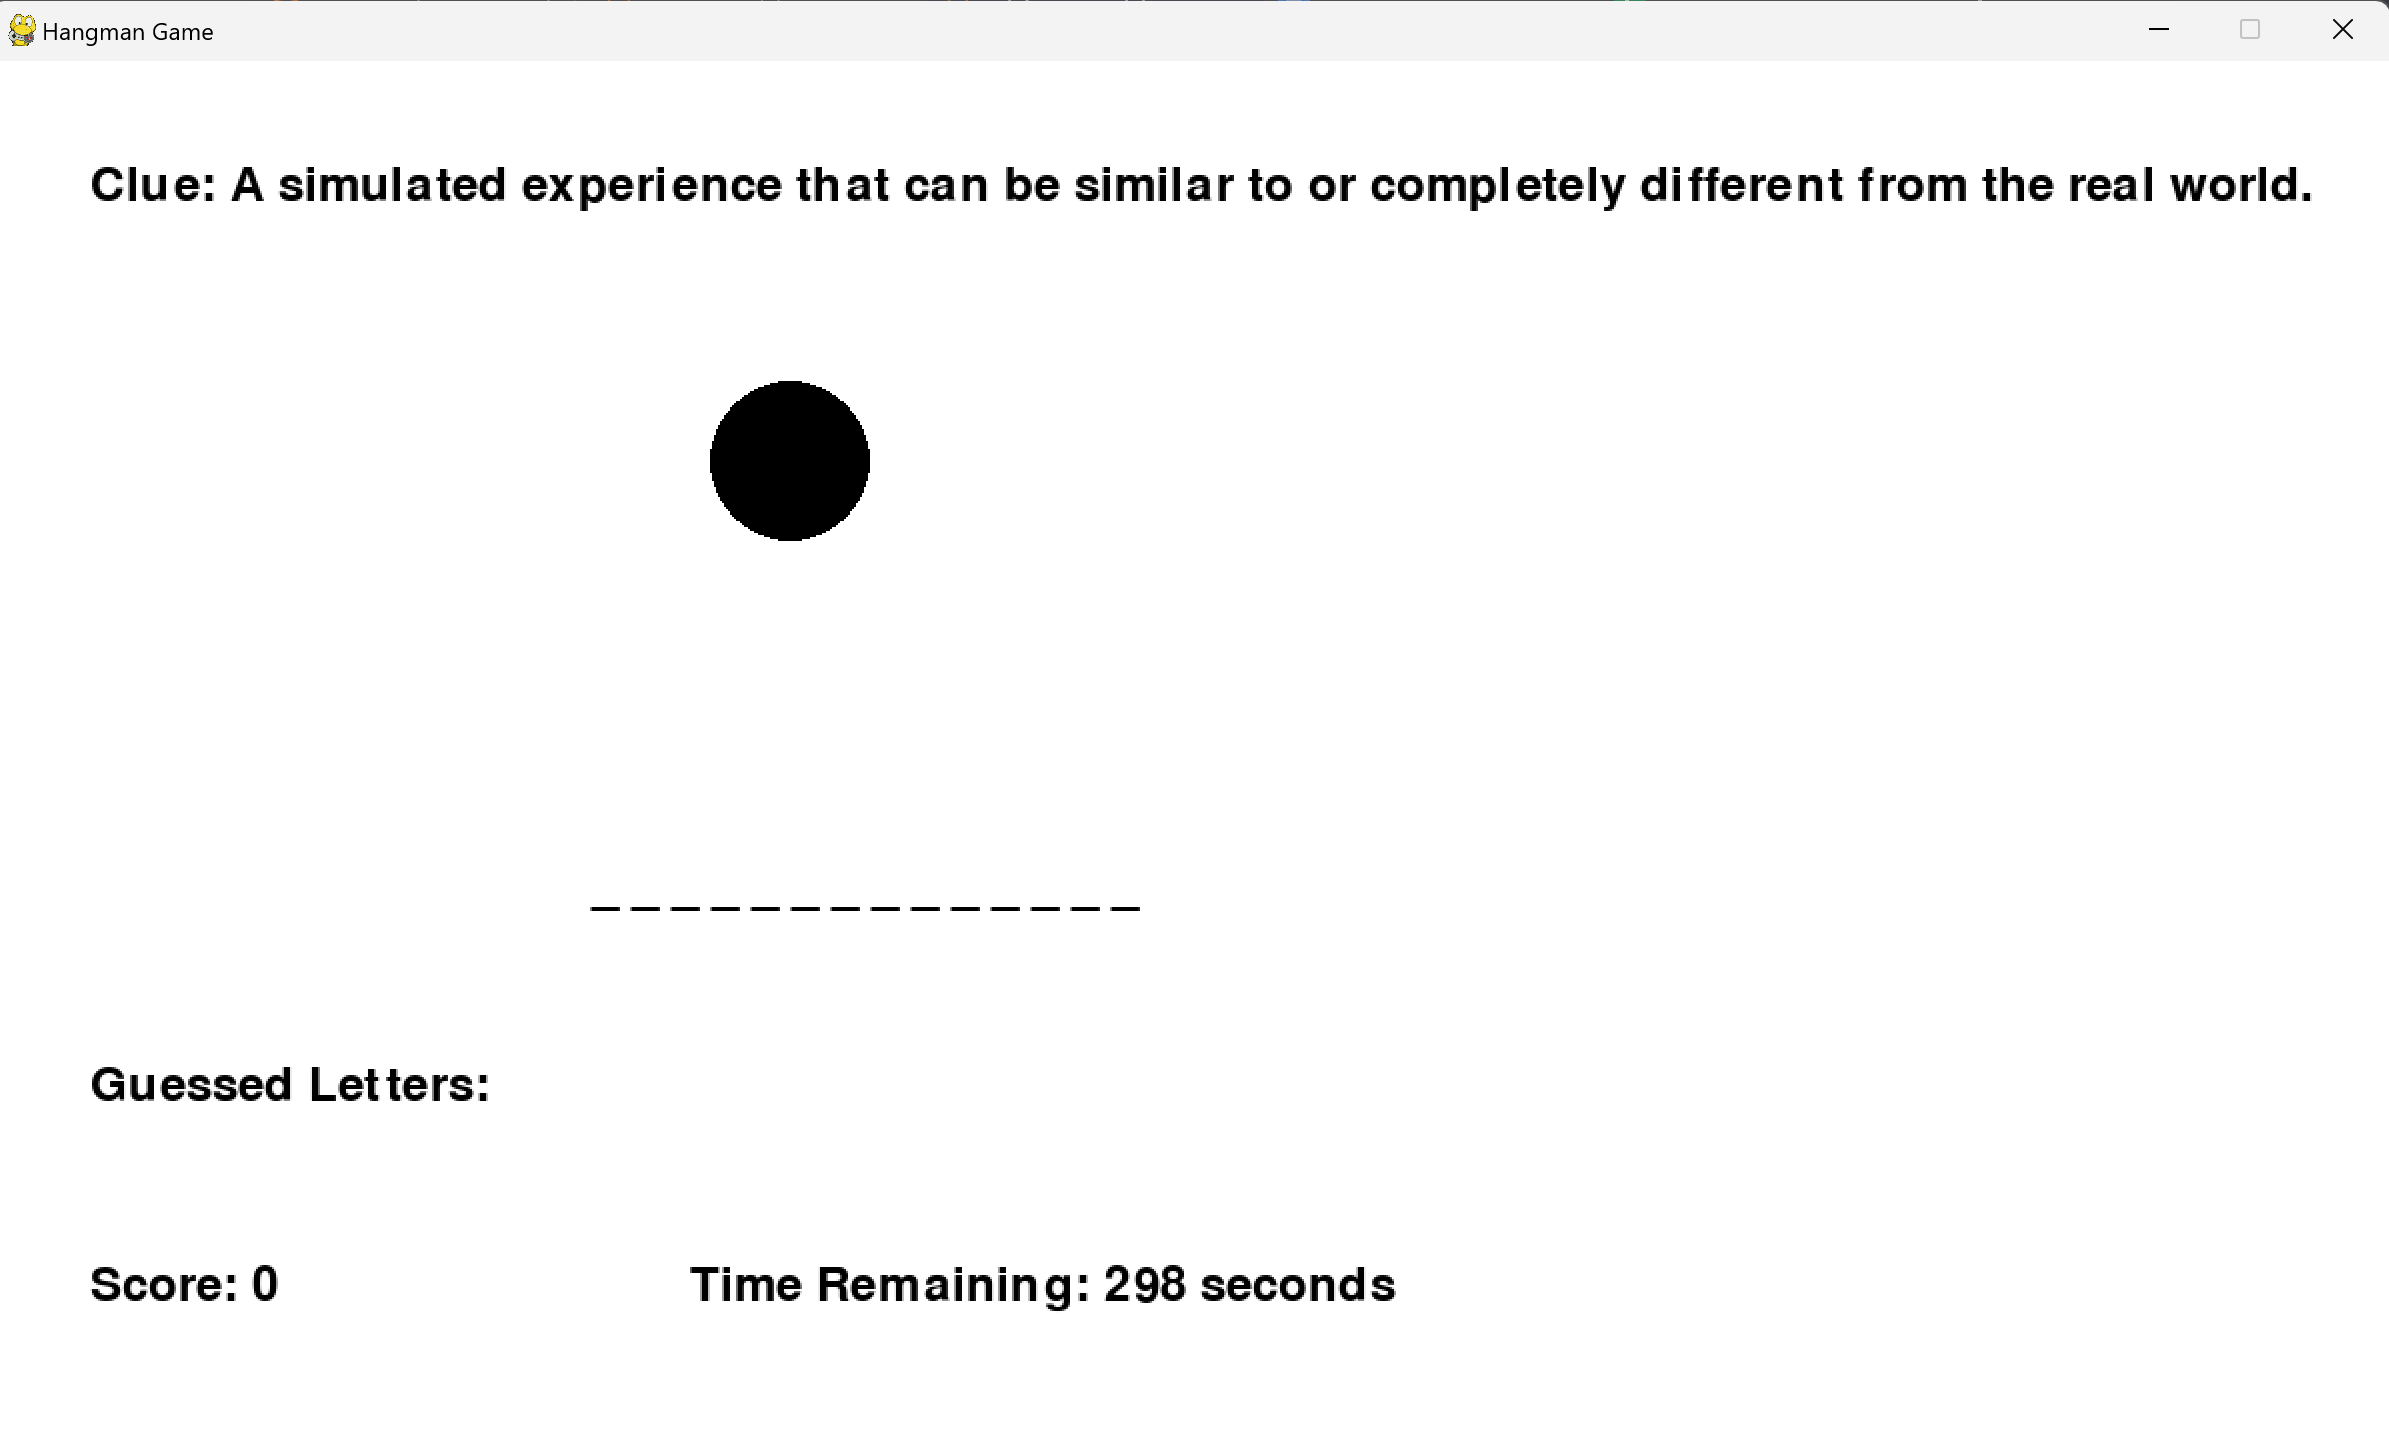

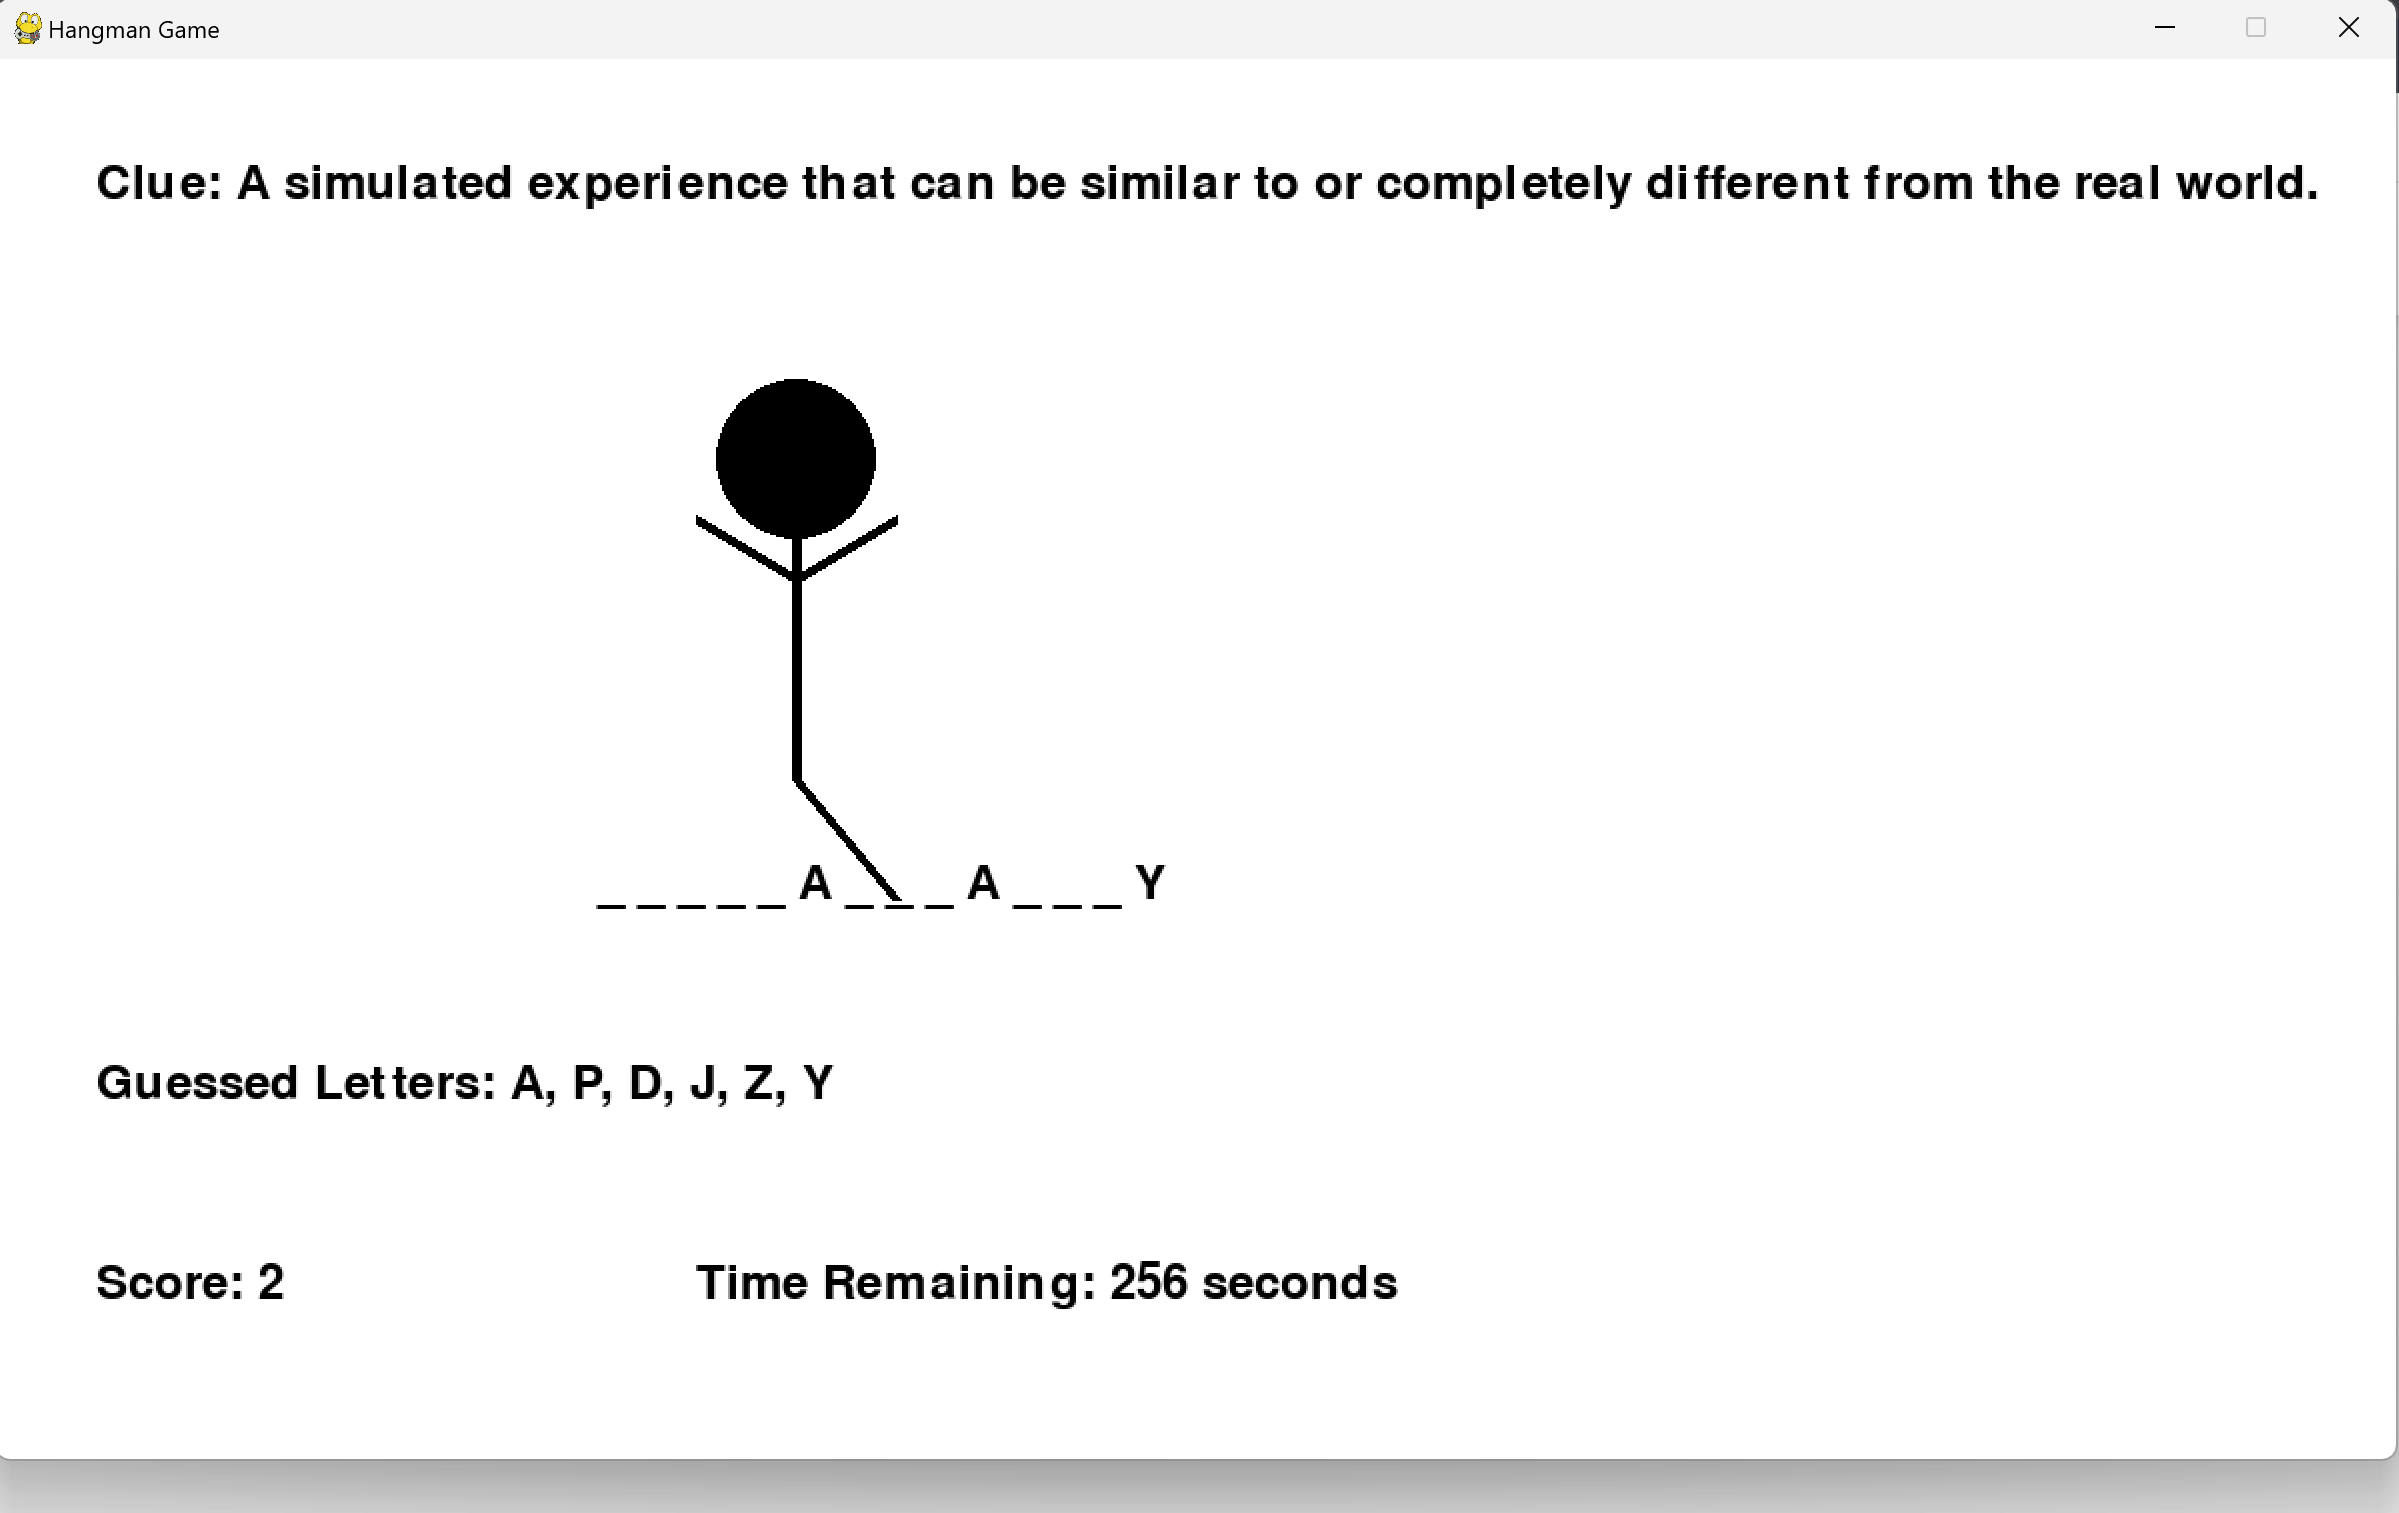